# Workshop for her 2021.2 - Introdução à Finanças Quantitativas 

**Conteúdos**

0. Pandas
1. Importando dados históricos
2. Retorno e risco
3. Sharpe Ratio
4. Teoria Moderna do Portfólio

## 0. Pandas
Pandas é uma biblioteca para manipulação de dados estruturados, sendo fundamental para qualquer análise de dados em Python. 


### Dados estruturados
Existem dois tipos principais de dados estruturados no pandas: Series (1 dimensão) e DataFrame (2 dimensões) 

- Series
    Um panda Series é um array de uma dimensão, como por exemplo:
    
    cliente = pd.Series(["Fulano", "Ciclano", "Beltrano"])
    

- DataFrame
 É uma tabela como a de uma planilha Excel, contendo colunas (columns) e linhas (rows). Um dataframe nada mais é do que vários pandas Series empilhados verticalmente. As colunas serão indexadas pelo nome das variáveis (e.g. "Cliente") já as linhas em geral são indexadas com números inteiros (mas em certos casos também usa-se strings). Desta forma, os valores da tabela podem ser acessadas tanto pela posição (i-ésima linha, j-ésima coluna), quando pela indexação (linha i, coluna "Cliente").

 ### Vantagens

Existem inúmeras vantagens em se utilizar a biblioteca pandas, seja pela praticidade em se manipular tabelas, como também pela rapidez das funções. Podemos citar a facilidade em:

- Tratamento de missing data
- Filtragem das informações da tabela mantendo a indexação original
- Acessar estatísticas de uma ou múltiplas colunas 

Para mais informações sobre Pandas, recomendamos acessar a documentação oficial [aqui](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) (em inglês). 


In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame({'Sim' : [50, 100],
             'Não': [10, 20]})

,Sim,Não
0,50,10
1,100,20


In [ ]:
pd.DataFrame({'Vitoria': ['Gostei', 'Não gostei'],
             'Letícia': ['Legal', 'Não gostei']})

,Vitoria,Letícia
0,Gostei,Legal
1,Não gostei,Não gostei


O `pd.DataFrame` gera objetos do tipo DataFrame. 

Para declararmos um DataFrame, utilizamos um dicionário cujas chaves são os nomes das colunas (ex: Bob e Sue) e os valores são uma lista de entradas

In [ ]:
pd.DataFrame({'Vitoria': ['Gostei', 'Não gostei'],
             'Letícia': ['Legal', 'Não gostei']},
            index = ['Produto A', 'Produto B'])

,Vitoria,Letícia
Produto A,Gostei,Legal
Produto B,Não gostei,Não gostei


Podemos acessar colunas específicas com a seguinte sintaxe:

In [ ]:
dataframe = pd.DataFrame({'Vitoria': ['Gostei', 'Não gostei'],
             'Letícia': ['Legal', 'Não gostei']},
            index = ['Produto A', 'Produto B'])

In [ ]:
dataframe.Vitoria

Produto A        Gostei
Produto B    Não gostei
Name: Vitoria, dtype: object

In [ ]:
dataframe['Vitoria']

Produto A        Gostei
Produto B    Não gostei
Name: Vitoria, dtype: object

Um panda Series é uma sequência de valores. Se o DataFrame é uma tabela, uma Series é uma lista

In [ ]:
pd.Series([1, 2, 3, 4, 5, 6])

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

## 1. Importando dados históricos 
Existem vários caminhos para obtenção dos dados de preços históricos de ativos, como através de sites de investimentos ou APIs. 
Podemos citar como exemplo as seguintes plataformas:
- Google Finance (Via panda_datareader)
- Yahoo Finace (Via panda_datareader ou yfinance)
- Quandl
- Alpha Vantage [(tutorial)](https://medium.com/turing-talks/an%C3%A1lise-de-uma-a%C3%A7%C3%A3o-em-python-b8114bce2fc) 
- Investing.com (investpy) 

A [investpy](https://investpy.readthedocs.io/) é uma biblioteca gratuita em python que permite o acesso a dados, tanto recentes quanto históricos, de qualquer produto indexado na plataforma investing.com, ou seja, com a biblioteca podemos acessar o preço histórico de ações, fundos de investimentos, ETF's, dentre outros!

Aqui, vamos usá-la para importar os DataFrames que queremos analisar.

In [ ]:
import investpy as inv

Primeiro, importamos os dados das ações da Magalu nos últimos 3 anos:

In [ ]:
mglu = inv.get_stock_historical_data(stock='MGLU3',
                              country='Brazil',
                              from_date='01/01/2018',
                              to_date='01/01/2021')

In [ ]:
# Usamos o método .head() para ver as 5 primeiras linhas do dataframe
mglu.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2018-01-02,2.50,2.54,2.42,2.45,59427200,BRL
2018-01-03,2.44,2.51,2.39,2.42,41385600,BRL
2018-01-04,2.47,2.49,2.45,2.48,47936000,BRL
2018-01-05,2.48,2.50,2.42,2.43,30684800,BRL
2018-01-08,2.42,2.47,2.42,2.43,28796800,BRL


In [ ]:
# E o método .tail() para ver as 5 últimas linhas do dataframe
mglu.tail()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2020-12-22,25.26,25.39,24.82,25.13,25223000,BRL
2020-12-23,25.22,25.60,24.94,24.94,20558600,BRL
2020-12-28,24.75,25.30,24.37,25.22,23099100,BRL
2020-12-29,25.20,25.53,24.99,25.25,17789700,BRL
2020-12-30,25.37,25.66,24.95,24.95,19188700,BRL


Agora que conseguimos visualizar o dataframe, vamos entender o que cada coluna representa!
* *Open* é o preço de abertura do ativo no dia de negociação
* *High* é o preço mais alto do ativo no dia de negociação
* *Low* é o preço mais baixo do ativo no dia de negociação
* *Close* é o preço de fechamento do ativo no dia de negociação
* *Volume* é o volume de negociação do ativo em Reais
* *Currency* é a moeda local, nesse caso o Real


Comparando os dados de 2018 e final de 2020, percebemos que os preços das ações da Magalu aumentaram em aproximadamente dez vezes nesse período, o que demonstra uma valorização geral da empresa no mercado.

Agora que obtivemos os dados de um ativo, como podemos montar e analisar uma carteira de investimentos com mais ações?

Vamos montar uma carteira com 5 ações e selecionar apenas os preços de fechamento (Close), abrigando-os em um novo dataframe.

In [ ]:
df = pd.DataFrame()

tickers = ['VALE3', 'ITUB4', 'ABEV3', 'PETR4']
for i in tickers:
    prices = inv.get_stock_historical_data(stock = i, country='Brazil', from_date='01/01/2018', to_date='01/01/2021')['Close']
    df[i] = prices

df['MGLU3'] = mglu['Close']

In [ ]:
df.head()

,VALE3,ITUB4,ABEV3,PETR4,MGLU3
Date,,,,,
2018-01-02,40.10,23.99,21.00,15.88,2.45
2018-01-03,39.86,24.15,21.05,16.02,2.42
2018-01-04,40.02,24.66,20.94,16.05,2.48
2018-01-05,40.64,24.73,21.01,16.15,2.43
2018-01-08,41.55,24.65,20.98,16.34,2.43


Para visualizarmos rapidamente a evolução dos preços, podemos usar o método `.plot()` do próprio pandas

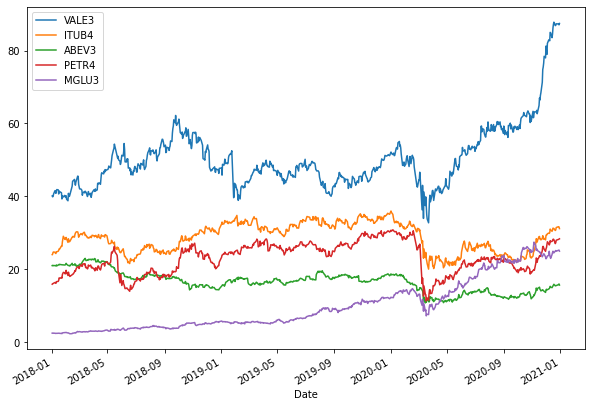

In [ ]:
df.plot(figsize=(10, 7));

Com esse gráfico, conseguimos ter uma boa noção sobre a evolução dos preços de cada ativo da nossa carteira. Porém, para definir em quais ativos seria vantajoso investir, não basta analisar os preços: precisamos entender quanto aquele investimento irá nos retornar ao longo do tempo. 

Então, partindo dos dados apresentados no dataframe, como podemos manipulá-los para descobrir o *retorno* que cada ação oferece?

## 2. Retorno e risco

Com os dados dos ativos em mãos, para analisá-los, precisamos entender dois conceitos importantes: Retorno e risco.
Primeiramente, importamos bibliotecas que precisaremos para fazer os cálculos dessa seção.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 


### 2.1. Retorno

#### Retorno simples

Começamos pelo principal fator que motiva a realização de um investimento: o retorno, ou seja, o quanto se ganhou com tal investimento.

Para calculá-lo, deveríamos considerar os dividendos (parcela do lucro de uma empresa distribuída aos acionistas) pagos pela empresa ao longo do período analisado. No entanto, não possuímos essa informação nos nossos dados. Por isso, consideraremos apenas o retorno advindo do aumento (ou queda) do preço da ação, o que chamamos de **retorno simples**, calculado pela seguinte fórmula:

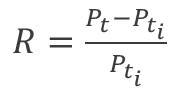

Sendo:

- *R*: retorno da ação;
- *P_t*: preço da ação no dia em que foi vendida (preço final);
- *P_ti*: preço da ação no dia em que foi comprada (preço inicial).

Podemos fazer essa conta facilmente usando a função  ``` pct_change()``` do pandas.



In [ ]:
df.pct_change().head()

,VALE3,ITUB4,ABEV3,PETR4,MGLU3
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.005985,0.006669,0.002381,0.008816,-0.012245
2018-01-04,0.004014,0.021118,-0.005226,0.001873,0.024793
2018-01-05,0.015492,0.002839,0.003343,0.006231,-0.020161
2018-01-08,0.022392,-0.003235,-0.001428,0.011765,0.000000


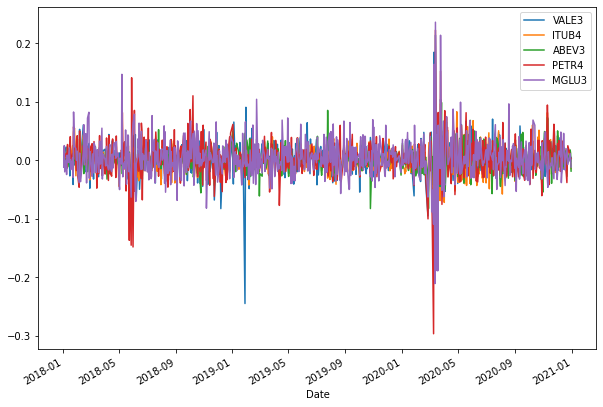

In [ ]:
df.pct_change().plot(figsize=(10, 7));

Agora sabemos como calcular o risco dos ativos individualmente, mas como calcular o retorno de um portfólio com mais de um?

Para isso, é preciso ponderar o retorno de cada ativo pelo seu respectivo peso. O peso de uma ação é o percentual de quanto ela representa do total da carteira. Assim, a soma desses pesos deve totalizar 1 (=100%).

Tomemos a nossa carteira de exemplo. Nela, temos 5 ações (nessa ordem): VALE3, ITUB4, ABEV3, PETR4, MGLU3. Se todas as 5 ações tiverem o mesmo peso, isso significa que temos 20% do nosso capital investido em cada uma delas e nosso vetor de pesos: w = [0.2, 0.2, 0.2, 0.2, 0.2]. 

Dessa forma, para obter o retorno simples do portfólio em uma data, multiplicamos o retorno de cada ativo pelo seu peso e somamos os resultados. Matematicamente, isso é dado pela seguinte fórmula vetorial:

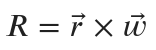

Onde 𝑟⃗ é o vetor de retornos de cada ativo da carteira no período, e 𝑤⃗ os seus respectivos pesos.

Obs: o resultado da multiplicação do retorno de um ativo em uma data pelo seu peso na carteira é denominado de attribution. Logo, o retorno do portfólio em uma data é a soma dos attributions de cada ativo, ou seja, suas contribuições.

In [ ]:
r = df.pct_change() #retornos do ativo
w = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) #pesos
R = np.dot(r, w) #retorno do portfólio

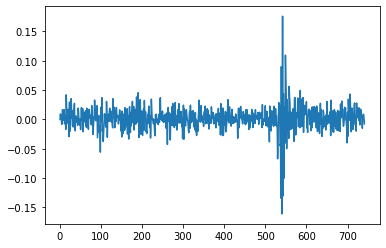

In [ ]:
plt.plot(R);

#### Retorno cumulativo


Vimos como calcular o retorno simples de um ativo para cada dia do período em questão. Mas, esse retorno dia a dia não nos diz muito sobre o ganho do investidor ao final do período. Para isso, podemos utilizar o retorno cumulativo simples, que é dado pela fórmula:

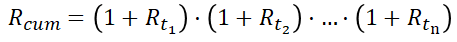

Sendo:

- *R_cum*: retorno simples cumulativo;
- *R_t1*: retorno simples do primeiro dia de investimento;
- *R_t2*: retorno simples do segundo dia de investimento;
- *R_n*: retorno simples do último dia.

Essa fórmula pode parecer contra-intuitiva em um primeiro momento. Por que uma multiplicação em vez de uma soma? 

Para entender isso, precisamos lembrar que cada retorno é um percentual. Por exemplo, se você comprou uma ação e ela valorizou 5% em um dia e, no dia seguinte, ela desvalorizou 2%, quanto ela valorizou (ou desvalorizou) ao todo considerando esse período? A resposta não é simplesmente 3%, pois repare que ela desvalorizou 2% considerando a valorização de 5% do dia anterior. Ou seja, ela diminuiu 2% do 105% do valor original. Assim, fazendo as contas, vemos que (1 + 5%)x(1 - 2%) = (1,05)x(0,98) =  1,029 = 102,9%. Ou seja, a ação valorizou 2,9%.

In [ ]:
cum_return = np.cumprod(1 + df.pct_change()) - 1
cum_return.head()

,VALE3,ITUB4,ABEV3,PETR4,MGLU3
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.005985,0.006669,0.002381,0.008816,-0.012245
2018-01-04,-0.001995,0.027928,-0.002857,0.010705,0.012245
2018-01-05,0.013466,0.030846,0.000476,0.017003,-0.008163
2018-01-08,0.036160,0.027511,-0.000952,0.028967,-0.008163


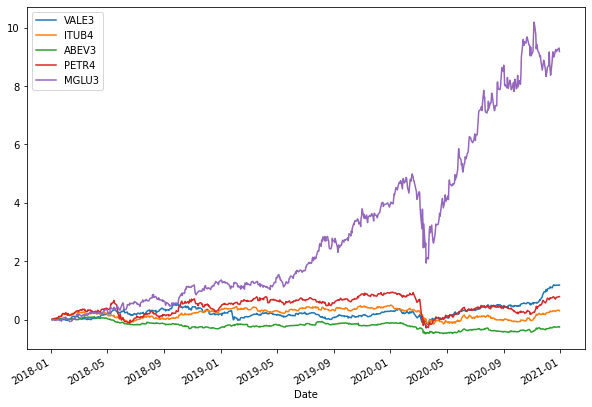

In [ ]:
cum_return.plot(figsize = (10,7));

In [ ]:
cum_return_portoflio = np.cumprod(1 + R[1:]) - 1

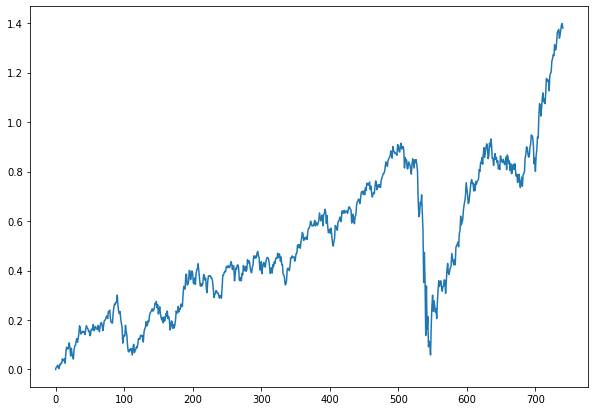

In [ ]:
plt.figure(figsize = (10, 7))
plt.plot(cum_return_portoflio);

### 2.2. Risco


Podemos calcular o retorno acumulado com os retornos simples do portfolio que tínhamos calculado anteriormente.

Primeiramente, o que é o risco no contexto de investimentos? De forma simples, podemos defini-lo como a probabilidade de insucesso do investimento. Mas daí vem outra pergunta: como mensurar isso?

Como exemplo, observe o gráfico do retorno diário das ações da LATAM (LTM) e da Telefônica (TEF) entre o final de 2018 e 2020:

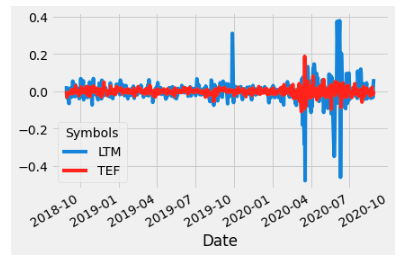

Note que o retorno da LATAM sofreu variações muito maiores do que da Telefônica, isto é, os retornos da Telefônica ficaram próximos da média, enquanto que o da LATAM não. Isso quer dizer que a **volatilidade** da empresa aérea para um determinado período de tempo foi maior do que da empresa de telefonia. Iremos então considerar essa volatilidade como o risco.


Para obter a volabilidade, calculamos o desvio padrão, cuja fórmula é:

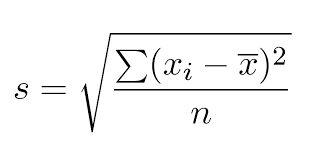

Sendo:

- x_i: retorno do dia;
- x_barra: média dos retornos;
- n: número de retornos.

(x_i — x_barra) mede o quanto o retorno no dia i diverge da média. Tomamos o quadrado dessa diferença para termos valores positivos (para uma diferença negativa não 'cancelar' uma positiva), e então somamos elas. Tiramos a média ao dividir por n e, finalmente, desfazemos o efeito do “elevar ao quadrado” ao tirar a raiz quadrada.

Podemos calcular o desvio padrão facilmente com o método ```.std()``` do pandas. Além disso, multiplicaremos por 252 (dias úteis no ano) para obter o risco anual e não diário.



In [ ]:
df.std() * np.sqrt(252)

VALE3    140.214675
ITUB4     62.487419
ABEV3     45.272923
PETR4     67.717767
MGLU3    110.345384
dtype: float64

#### Risco de uma carteira

Intuitivamente pode se pensar que, para calcular o risco do portfólio, basta calcular o desvio padrão de cada ação e multiplicar pelo seu respectivo peso. Esse até poderia ser o caso se a flutuação de cada uma das ações fossem eventos independentes entre si. Mas esse difcilmente será o caso, pois as ações geralmente oscilam conjuntamente.

Assim, precisamos considerar não somente as variâncias (quadrado do desvio padrão) das ações, mas também a correlação de cada uma com as demais. Para isso, usamos a matriz de covariância (C). As covariâncias são dadas por:

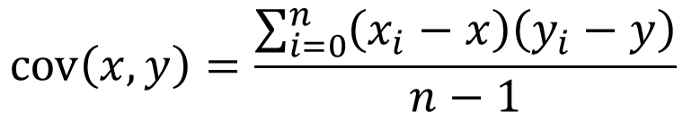

Sendo:

- *xi*: o retorno da ação A no dia i;
- *x*: o retorno médio da ação A;
- *yi*: o retorno da ação B no dia i;
- *y*: o retorno médio da ação B;
- *n*: o número de dias analisados.

Note que, aplicando essa fórmula a cada elemento da matriz de covariância C, a diagonal principal apresentará uma característica interessante: nessa, será calculada a covariância entre a ação e ela mesma, , observando a fórmula, vemos que resulta na variância.

Por fim, ainda precisamos considerar os pesos das ações. Assim, a volatilidade de um portfólio é dada por: 

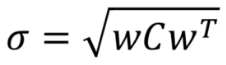

Sendo:

- *w*: array de dimensão (1 x n) com os pesos de cada ação, sendo n o número de ações do portfólio;
- *C*: matriz de covariância (n x n) das ações do portfólio;
- *wT*: transposição do array com os pesos de cada ação (n x 1).

In [ ]:
r = df.pct_change()

# média dos retornos anualizados 
mean_returns = r.mean() * 252

# matriz de covariância 
covariance = np.cov(r[1:].T)

In [ ]:
vol = np.sqrt(np.dot(w.T, np.dot(covariance, w))) * np.sqrt(252)

In [ ]:
vol

0.329888076500129

## 3. Sharpe Ratio 

Sharpe Ratio é um índice de comparação entre investimentos que leva em conta rentabilidade e risco, seguindo a fórmula:   

$S = \frac{R-R_{f}}{\sigma}$

In [ ]:
risk_free = 0

In [ ]:
mean_returns = r.mean() * 252

In [ ]:
R = np.dot(mean_returns, w)

In [ ]:
sharpe = (R - risk_free) / vol

In [ ]:
sharpe

1.060625780914644

## 4. Teoria Moderna do Portfólio de Harry Markowitz

Agora que já aprendemos o básico sobre preços, retorno e risco, vamos usar esses conceitos para otimizar o nosso portfólio.
Podemos definir uma otimização de portfólio como o processo utilizado para selecionarmos a melhor distribuição de ativos em uma carteira a fim de atingirmos um _objetivo comum_.

**Objetivo**: Dado um certo nível de risco, vamos escolher o portfólio que nos oferece o maior retorno

### 4.1. Simulando Portfólios

In [ ]:
def generate_wallets(df_close, num_portfolios = 10000, risk_free = 0):
   
    # vetores de dados
    portfolio_weights = []
    portfolio_exp_returns = []
    portfolio_vol = []
    portfolio_sharpe = []

    # retorno simples 
    r = ...
    mean_returns = ...

    # matriz de covariância 
    covariance = ...

    for i in range(num_portfolios):
        # gerando pesos aleatórios
        k = np.random.rand(len(df.columns))
        w = k / sum (k)

        # retorno
        R = ...

        # risco
        vol = np.sqrt(np.dot(..., np.dot(...))) * np.sqrt(252)

        # sharpe ratio
        sharpe = (... - ...)/...

        portfolio_weights.append(w)
        portfolio_exp_returns.append(R)
        portfolio_vol.append(vol)
        portfolio_sharpe.append(sharpe)

    wallets = {'weights': portfolio_weights,
              'returns': portfolio_exp_returns,
              'vol':portfolio_vol,
              'sharpe': portfolio_sharpe}

    return wallets

In [ ]:
wallets = generate_wallets(df)

Incialmente, vamos utilizar como métrica para selecionar o melhor portfólio aquele que tiver o maior Sharpe Ratio:

In [ ]:
def best_portfolio(wallets):
    sharpe = wallets['sharpe']
    
    weights = wallets['weights']
    
    indice = np.array(sharpe).argmax()
        
    return weights[indice]

In [ ]:
best_portfolio(wallets)

array([9.02928744e-02, 1.17395769e-01, 4.22298079e-04, 1.19302254e-02,
       7.79958834e-01])

Vamos comparar os retornos com o nosso portfólio anterior:

In [ ]:
new_weights = np.array(best_portfolio(wallets))

In [ ]:
new_portfolio = np.dot(r, new_weights)
new_cum_returns = np.cumprod(1 + new_portfolio[1:]) - 1

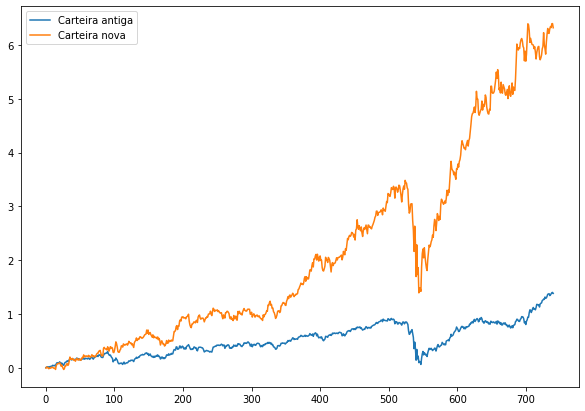

In [ ]:
plt.figure(figsize = (10, 7))
plt.plot(cum_return_portoflio, label = 'Carteira antiga')
plt.plot(new_cum_returns, label = 'Carteira nova')
plt.legend();

In [ ]:
cum_return_portoflio[-1] 

1.3796066319610438

In [ ]:
new_cum_returns[-1] 

6.320279076048592

Como já conversamos anteriormente, não basta apenas olhar para o retorno dos investimentos (apesar do nosso ganho ser bem expressivo com a nova carteira). Vamos olhar também para outras métricas:

### Volatilidade

In [ ]:
new_vol = np.sqrt(np.dot(new_weights.T, np.dot(covariance, new_weights))) * np.sqrt(252)

In [ ]:
print(f'Volatilidade - Carteira antiga: {vol}')
print(f'Volatilidade - Carteira nova: {new_vol}')

Volatilidade - Carteira antiga: 0.329888076500129
Volatilidade - Carteira nova: 0.4656476655385215


### Sharpe Ratio

In [ ]:
def sharpe_ratio(returns, weights, volatility, risk_free = 0):
    
    mean_returns = returns.mean() * 252
    
    R = np.dot(mean_returns, weights)
    
    sharpe = (R - risk_free) / volatility
    
    return sharpe

In [ ]:
print(f'Sharpe Ratio - Carteira antiga: {sharpe_ratio(r, w, vol)}')
print(f'Sharpe Ratio - Carteira nova:   {sharpe_ratio(r, new_weights, new_vol)}')

Sharpe Ratio - Carteira antiga: 1.060625780914644
Sharpe Ratio - Carteira nova:   1.6878641001632226


### 4.2. A fronteira eficiente
- A fronteira eficiente nada mais é do que a linha que representa os retornos máximos que podemos obter com um portfólio dado um certo nível de risco. 
- Portfólios ótimos sempre devem estar na linha da fronteira, pois, para qualquer portfólio abaixo da linha, há uma carteira disponível com o mesmo risco associado, porém com um retorno maior

In [ ]:
def plot_efficient_frontier(wallets):
    
    vol = wallets['vol']
    returns = ...
    sharpe = ...

    indice = np.array(sharpe).argmax()
    y_axis = ...[indice]
    X_axis = ...[indice]

    plt.scatter(vol, returns, c = sharpe, cmap = 'viridis')
    plt.scatter(X_axis, y_axis, c = 'red', s = 50)
    plt.colorbar(label = 'Sharpe Ratio')
    plt.title("Efficient Frontier")
    plt.xlabel("Volatility")
    plt.ylabel("Expected return")
    plt.show()

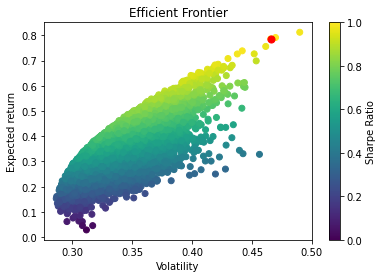

In [ ]:
plot_efficient_frontier(wallets)

### 4.3. Afinal, o que é um portfólio eficiente?

In [ ]:
def best_portfolio(wallets, method = 'sharpe_ratio'):
    
    vol = wallets['vol']
    sharpe = wallets['sharpe']
    weights = wallets['weights']
    returns = wallets['returns']
    
    if method == 'sharpe_ratio':

        indice = np.array(...).argmax()

    elif method == 'volatility':

        indice = np.array(...).argmin()

    elif method == 'return':

        indice = np.array(...).argmax()

    return weights[indice]

In [ ]:
def plot_efficient_frontier(wallets, method = 'sharpe_ratio'):
    vol = wallets['vol']
    returns = wallets['returns']
    sharpe = wallets['sharpe']

    if method == 'sharpe_ratio':

        indice = np.array(...).argmax()
        y_axis = returns[indice]
        X_axis = vol[indice]

    elif method == 'volatility':

        indice = np.array(...).argmin()
        y_axis = returns[indice]
        X_axis = vol[indice]

    elif method == 'return': 

        indice = np.array(...).argmax()
        y_axis = returns[indice]
        X_axis = vol[indice]

    plt.scatter(vol, returns, c = sharpe, cmap = 'viridis')
    plt.scatter(X_axis, y_axis, c = 'red', s = 50)
    plt.title("Efficient Frontier")
    plt.xlabel("Volatility")
    plt.ylabel("Expected return")
    plt.show()